In [3]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import string

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
## load data
data = pd.read_csv("~/Documents/Duke/Cynthia Research/KY-analysis-mytrials/KY Recidivism/KY data/kentucky_stumps.csv")
X, Y = data.loc[:,:'current_violence>=1'], data.loc[:,'recid_two_year'].values
Y[Y == -1] = 0
cols = data.columns[:-14]

In [17]:
## set up parameters
cross_validation = KFold(n_splits=5,shuffle=True,random_state=816)
lr = LogisticRegression(class_weight = 'balanced', solver='liblinear', random_state=816, penalty='l1')
c_grid = {"C": [1e-4, 1e-3, 1e-2, 0.1]}

## cross validation
clf = GridSearchCV(estimator=lr, param_grid=c_grid, scoring='roc_auc',
                   cv=cross_validation, return_train_score=True).fit(X,Y)
train_score = clf.cv_results_['mean_train_score']
test_score = clf.cv_results_['mean_test_score']
test_std = clf.cv_results_['std_test_score']

### scores
best_auc = clf.best_score_
best_std = test_std[np.where(test_score == clf.best_score_)[0][0]]
best_param = clf.best_params_
auc_diff = train_score[np.where(test_score == clf.best_score_)[0][0]] - clf.best_score_

#### best parameters

In [33]:
lr = LogisticRegression(class_weight = 'balanced', solver='liblinear', random_state=816, penalty='l1', C=0.1).fit(X,Y)
coefs = lr.coef_[lr.coef_ != 0]
features = cols[lr.coef_[0] != 0].tolist()

In [39]:
## data frame
coefs_pd = pd.DataFrame(coefs[coefs != 0])
features_pd = pd.DataFrame(cols[lr.coef_[0] != 0])

## dictionary
lr_dict = {}
lr_dict_rounding = {}
for i in range(len(features)):
    lr_dict.update({features[i]: coefs[i]})
    lr_dict_rounding.update({features[i]: round(coefs[i], 3)})

In [41]:
lr_table = pd.concat([features_pd, coefs_pd], axis=1)
lr_table.columns = ['Features', 'Scores']
lr_table

,Features,Scores
0,Gender>=1,0.164577
1,age_at_current_charge<=18,0.219210
2,age_at_current_charge<=19,0.083839
3,age_at_current_charge<=20,0.003194
4,age_at_current_charge<=24,-0.022577
5,age_at_current_charge<=29,-0.003680
6,age_at_current_charge<=30,-0.031230
7,age_at_current_charge<=38,0.083466
8,age_at_current_charge<=43,0.051678
9,age_at_current_charge<=46,0.109045


In [43]:
lr_dict

{'Gender>=1': 0.16457656236721327,
 'age_at_current_charge<=18': 0.21920991853740054,
 'age_at_current_charge<=19': 0.08383866021951052,
 'age_at_current_charge<=20': 0.003193853871455214,
 'age_at_current_charge<=24': -0.02257674563328515,
 'age_at_current_charge<=29': -0.003679834240938767,
 'age_at_current_charge<=30': -0.031229748299139132,
 'age_at_current_charge<=38': 0.08346603475416127,
 'age_at_current_charge<=43': 0.05167751394938238,
 'age_at_current_charge<=46': 0.10904530310268049,
 'age_at_current_charge<=52': 0.11054678953021009,
 'age_at_current_charge<=55': 0.08803430815608233,
 'age_at_current_charge<=61': 0.16746644464533172,
 'age_at_current_charge<=67': 0.13505919702139954,
 'p_arrest>=1': -0.6644237674333213,
 'p_arrest>=2': 0.7981002856141041,
 'p_arrest>=3': 0.4826132657102559,
 'p_arrest>=4': 0.3477786634674311,
 'p_arrest>=5': 0.3023622805576358,
 'p_arrest>=6': 0.18604274481827096,
 'p_arrest>=7': 0.23216175626659163,
 'p_arrest>=8': 0.10001063093244818,
 'p_

#### Cross Validation
-- Original dictionary

In [44]:
cv = KFold(n_splits=5, shuffle=True, random_state=816)
train_auc = []
test_auc = []

i = 0
for train, test in cv.split(X,Y):    
    train_pred = test_pred = 0  
    X_train, Y_train = X.iloc[train], Y[train]
    X_test, Y_test = X.iloc[test], Y[test]
    
    for k in features:
        train_values = X_train[k]*lr_dict[k]
        test_values = X_test[k]*lr_dict[k]
        train_pred += train_values
        test_pred += test_values
        
    train_pred += lr.intercept_
    test_pred += lr.intercept_
    
    ## auc
    train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_pred)
    test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_pred)
    train_auc.append(auc(train_fpr, train_tpr))
    test_auc.append(auc(test_fpr, test_tpr))
    i += 1

In [45]:
np.mean(train_auc), np.mean(test_auc)

(0.7387881452562813, 0.7387668518558688)

-- Rounding Dictionary

In [28]:
cv = KFold(n_splits=5, shuffle=True, random_state=816)
train_auc = []
test_auc = []

i = 0
for train, test in cv.split(X,Y):    
    train_pred = test_pred = 0  
    X_train, Y_train = X.iloc[train], Y[train]
    X_test, Y_test = X.iloc[test], Y[test]
    
    for k in features:
        train_values = X_train[k]*lasso_dict_rounding[k]
        test_values = X_test[k]*lasso_dict_rounding[k]
        train_pred += train_values
        test_pred += test_values
        
    train_pred += round(lasso.intercept_,3)
    test_pred += round(lasso.intercept_,3)
    
    ## auc
    train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, train_pred)
    test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, test_pred)
    train_auc.append(auc(train_fpr, train_tpr))
    test_auc.append(auc(test_fpr, test_tpr))
    i += 1

In [29]:
np.mean(train_auc), np.mean(test_auc)

(0.731869832566285, 0.7318585784054392)

## Make Table

In [30]:
print('+-----------------------------------+----------------+')
print('|', 'Features', '{n:>{ind}}'.format(n = '|', ind=26), 'Score', '{n:>{ind}}'.format(n = '|', ind=10))
print('|====================================================|')
for i in range(len(lasso_dict)):
    print('|', features[i], '{n:>{ind}}'.format(n = '|', ind=35 - len('|'+features[i])),lasso_dict_rounding[features[i]], '{n:>{ind}}'.format(n = '|', ind = 15 - len(np.str(lasso_dict_rounding[features[i]]))))
print('|', 'Intercept', '{n:>{ind}}'.format(n = '|', ind=25), round(lasso.intercept_,3), '{n:>{ind}}'.format(n = '|', ind = 29 - len(np.str(lasso.intercept_)))) 
print('|====================================================|')
print('|', 'ADD POINTS FROM ROWS 1 TO', len(lasso_dict), '{n:>{ind}}'.format(n = '|', ind = 6), 'Total Score', '{n:>{ind}}'.format(n = '|', ind = 4))
print('+-----------------------------------+----------------+')

+-----------------------------------+----------------+
| Features                          | Score          |
|====================================================|
| Gender>=1                         | 0.004          |
| age_at_current_charge<=38         | 0.007          |
| age_at_current_charge<=43         | 0.005          |
| p_arrest>=2                       | 0.118          |
| p_arrest>=3                       | 0.098          |
| p_arrest>=4                       | 0.076          |
| p_arrest>=5                       | 0.064          |
| p_arrest>=6                       | 0.018          |
| p_violence>=1                     | 0.024          |
| p_felony>=1                       | 0.017          |
| p_jail30>=1                       | 0.031          |
| p_pending_charge>=1               | 0.067          |
| p_probation>=1                    | 0.024          |
| Intercept                         | 0.123           |
|====================================================|
| ADD POI

## Visualization

In [31]:
labels = ['Gender', 'age_at_current_charge', 'arrest', 'charges', 'violence', 'felony', 'misdemeanor', 'property', 'murder', 
          'assault', 'sex_offense', 'weapon', 'felprop_viol', 'felassault', 'misdeassult', 'traffic', 'drug', 'dui', 
          'stalking', 'voyeurism', 'fraud', 'stealing', 'trespass', 'ADE', 'Treatment', 'prison', 'jail', 'fta_two_year', 
          'fta_two_year_plus', 'pending_charge', 'probation', 'SentMonths', 'six_month', 'one_year', 'three_year', 
          'five_year', 'current_violence']

In [17]:
def stumps_visulization(label, sub_features, features, coefs):
    cutoffs = []
    cutoff_values = []        
    cutoff_prep = []
    cutoff_values_prep = []
    
    ## select features
    if label == 'age_at_current_charge':
        
        ## sanity check
        if len(sub_features) == 1:
            cutoffs.append(int(sub_features[0][sub_features[0].find('=')+1:]))
            cutoff_values.append(coefs[np.where(np.array(features) == sub_features[0])[0][0]])
            
            ## prepare values
            cutoff_prep.append(np.linspace(18, cutoffs[0]+0.5, 1000))
            cutoff_prep.append(np.linspace(cutoffs[0]+0.5, 70, 1000))
            cutoff_values_prep.append(np.repeat(cutoff_values[0], 1000))
            cutoff_values_prep.append(np.repeat(0, 1000))
            
            plt.figure(figsize=(4,3))
            plt.scatter(cutoff_prep, cutoff_values_prep, s=0.05)
            plt.vlines(x=cutoffs[0]+0.5, ymin=0, ymax=cutoff_values[0], colors='C0', linestyles='dashed')
            plt.title(label)
            plt.show()
        else:
            for j in sub_features:
                cutoff_values.append(coefs[np.where(np.array(features) == j)[0][0]])
                cutoffs.append(int(j[j.find('=')+1:])) 
            
            ## prepare cutoff values for plots
            for n in range(len(cutoffs)-1):
                cutoff_prep.append(np.linspace(cutoffs[n]-0.5, cutoffs[n+1]-0.5, 1000))
                cutoff_values_prep.append(np.repeat(np.sum(cutoff_values[n:]), 1000)) 
            cutoff_prep.append(np.linspace(cutoffs[-1]-0.5, 70, 1000))
            cutoff_values_prep.append(np.repeat(np.sum(cutoff_values[-1]), 1000)) 
            
            ## visulization
            unique = np.unique(cutoff_values_prep)[::-1]
            unique_len = len(unique)
            plt.figure(figsize=(4,3))
            plt.scatter(cutoff_prep, cutoff_values_prep, s=0.05)
            for m in range(1,unique_len):
                plt.vlines(x=cutoffs[m]-0.5, ymin=unique[m], ymax=unique[m-1], colors = "C0", linestyles='dashed')
            plt.title(label)
            plt.show()
    else:
        ## sanity check
        if len(sub_features) == 1:
            cutoffs.append(int(sub_features[0][sub_features[0].find('=')+1:]))
            cutoff_values.append(coefs[np.where(np.array(features) == sub_features[0])[0][0]])
            
            ## prepare values
            cutoff_prep.append(np.linspace(-0.5, cutoffs[0]-0.5, 1000))
            cutoff_prep.append(np.linspace(cutoffs[0]-0.5, cutoffs[0]+0.5, 1000))
            cutoff_values_prep.append(np.repeat(0, 1000))
            cutoff_values_prep.append(np.repeat(cutoff_values[0], 1000))
            
            plt.figure(figsize=(4,3))
            plt.scatter(cutoff_prep, cutoff_values_prep, s=0.05)
            plt.vlines(x=cutoffs[0]-0.5, ymin=0, ymax=cutoff_values[0], colors='C0', linestyles='dashed')
            plt.title(label)
            plt.show()     
        else:
            for j in sub_features:
                cutoff_values.append(coefs[np.where(np.array(features) == j)[0][0]])
                cutoffs.append(int(j[j.find('=')+1:])) 
            
            ## prepare cutoff values for plots
            cutoff_prep = []
            cutoff_values_prep = []
            
            for n in range(len(cutoffs)-1):
                cutoff_prep.append(np.linspace(cutoffs[n]-0.5, cutoffs[n+1]-0.5, 1000))
                cutoff_values_prep.append(np.repeat(np.sum(cutoff_values[:n+1]), 1000))    
            cutoff_prep.append(np.linspace(cutoffs[-1]-0.5, cutoffs[-1]+0.5, 1000))
            cutoff_values_prep.append(np.repeat(np.sum(cutoff_values), 1000))   
            
            
            
            ## visualization
            unique = np.unique(cutoff_values_prep)
            unique_len = len(unique)
            plt.figure(figsize=(4,3))
            plt.scatter(cutoff_prep, cutoff_values_prep, s=0.05)
            for m in range(1, unique_len):
                plt.vlines(x=cutoffs[m]-0.5, ymin=unique[m], ymax=unique[m-1], colors = "C0", linestyles='dashed')
            plt.title(label)
            plt.show()          

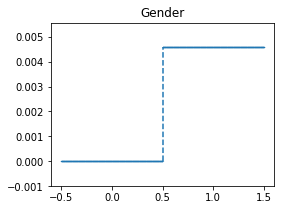

ValueError: invalid literal for int() with base 10: '38.0'

In [18]:
for i in labels:
    sub_features = np.array(np.array(features)[[i in k for k in features]])
    if len(sub_features) == 0:
        continue
    stumps_visulization(i, sub_features, features, coefs)

### Appendix

In [22]:
def stumps_visulization(label, sub_features, features, coefs):
    cutoffs = []
    cutoff_values = []        
    
    ## select features
    if label == 'age_at_current_charge':
        
        ## sanity check
        if len(sub_features) == 0:
            pass
        else:
            for j in sub_features:
                cutoff_values.append(coefs[np.where(np.array(features) == j)[0][0]])
                cutoffs.append(int(j[j.find('=')+1:])) 
            
            ## prepare cutoff values for plots
            cutoff_prep = []
            cutoff_values_prep = []
            
            for n in range(len(cutoffs)-1):
                cutoff_prep.append(np.linspace(cutoffs[n]-0.5, cutoffs[n+1]-0.5, 1000))
                cutoff_values_prep.append(np.repeat(np.sum(cutoff_values[n:]), 1000)) 
            cutoff_prep.append(np.linspace(cutoffs[-1]-0.5, 70, 1000))
            cutoff_values_prep.append(np.repeat(np.sum(cutoff_values[-1]), 1000)) 
            
        ## visulization
        unique = np.unique(cutoff_values_prep)[::-1]
        unique_len = len(unique)
        plt.scatter(cutoff_prep, cutoff_values_prep, s=0.05)
        for m in range(1,unique_len):
            plt.vlines(x=cutoffs[m]-0.5, ymin=unique[m], ymax=unique[m-1], colors = "C0", linestyles='dashed')
        plt.title(i)
        plt.show()
    else:
        ## sanity check
        if len(sub_features) == 0:
            pass
        else:
            for j in sub_features:
                cutoff_values.append(coefs[np.where(np.array(features) == j)[0][0]])
                cutoffs.append(int(j[j.find('=')+1:])) 
            
            ## prepare cutoff values for plots
            cutoff_prep = []
            cutoff_values_prep = []
            
            for n in range(len(cutoffs)-1):
                cutoff_prep.append(np.linspace(cutoffs[n]-0.5, cutoffs[n+1]-0.5, 1000))
                cutoff_values_prep.append(np.repeat(np.sum(cutoff_values[:n+1]), 1000))    
            cutoff_prep.append(np.linspace(cutoffs[-1]-0.5, cutoffs[-1]+0.5, 1000))
            cutoff_values_prep.append(np.repeat(np.sum(cutoff_values), 1000))   
            
        ## visualization
        unique = np.unique(cutoff_values_prep)
        unique_len = len(unique)
        plt.scatter(cutoff_prep, cutoff_values_prep, s=0.05)
        for m in range(1, unique_len):
            plt.vlines(x=cutoffs[m]-0.5, ymin=unique[m], ymax=unique[m-1], colors = "C0", linestyles='dashed')
        plt.title(i)
        plt.show()          